 # Mappeoppgave 2 - SOK 1006 V23 - Kandidatnummer [51]
 
 ## Kapittel 1 - Innledning

Bompengeavgift er en veiavgift som betales ved passeringen av en bomstasjon. Inntektene fra en bompengeavgift brukes ofte til å finansiere infrastrukturprosjekter, gjerne i form av nye veier, tunneler eller lignende. 

Bompenger brukes også til å regulere trafikken. Dette gjøres ofte med en "rushtidsavgift", hvor avgiften er høyere i rushtiden for å oppmuntre folk til å reise utenom disse tidene eller bruke alternativ transport. Dette er tilfellet i Tromsø, hvor prisen for å passere en bomstasjon er høyere mellom 06.30-09.00 og 15-17, for å utjevne trafikken og forhindre store køer. 

Tidligere har elektriske biler kjørt gratis forbi bommer. Dette var, sammen med mange andre fordeler, enda et insentiv til å kjøpe elektriske biler i stedetfor fossilbiler. Dette bli nylig endret, men de fleste bomprosjekter gir en rabatt for elbiler. Dette er tilfellet i Bergen, Skien, og også nå i Tromsø.(1)  Rabatten elbiler får er noe varierende – i Tromsø ligger den på 50 prosent.

I denne oppgaven prøver jeg å analysere hvordan innføringen av bompenger i Tromsø har påvirket trafikkbildet, og hvordan bilister som konsumenter reagerer på avgiften. Kapittel 1 innleder oppgaven, og forteller kort om bompenger og bakgrunnen for innføringen av dette i Tromsø. I kapittel 2 prøver jeg å gi en oversiktlig oppsummering av «markedet» for kjøring.  Her sammenligner jeg mye data fra samme tidsperiode i 2022 og 2023, slik at en lett kan se den konkrete forskjellen innføringen av bompenger har gjort så langt. 
Kapittel 3 tar for seg konsumentens tilpasning, og hvordan denne endrer seg med en dyrere pris per kilometer. Jeg ser her nærmere på hvilke effekter dette medbringer, og hvor store disse effektene er. 


### Bakgrunn for innføring

Bompengene i Tromsø ble innført i Januar 2023 for å finansiere Tenk Tromsø – «et nytt byutviklingsprosjekt som skal gjøre Tromsø mer fremkommelig og bærekraftig, i tråd med hovedmålet i nullvekst i personbiltransport» (2). Her er betalingen av bompenger «innbyggernes bidrag» til denne bypakken, hvilket står for mer enn halvparten av budsjettet. Tenk Tromsø vil bruke inntektene fra bompengeavgiften på blant annet ny bussterminal, reduserte billettpriser på buss, bygging av nye veier of fortau m.m. Totalt er 15 stasjoner satt opp i Tromsø, som deler byområdet i 7 soner. 
I tillegg til finansieringen av bypakken, har bompengene også som mål å gjøre Tromsø mer miljøvennlig. Ved å sette opp prisen på bilkjøring vil etterspørselen etter kjøring med bil gå ned, og forhåpentligvis vil bilister oftere velge mer miljøvennlige alternativer, som sykkel eller buss. 

### Tidligere erfaring 

Bompengeavgifter er langt fra en nytt i Norge. Slike type avgifter brukes i hele landet, og det kommer stadig nye prosjekter som involverer bompenger. I 2022 var det 344 bomstasjoner i bruk i hele landet, som til sammen genererte 19,7 milliarder kroner fra norske bilister (3). Bompengene har vært meget effektive for å skaffe kapital til veiarbeid og lignende arbeid, men ikke alle mener det er rettferdig slik systemet er nå. Flere mener at ordningen er urettferdig, da enkelte er mye mer avhengig av bil enn andre, og ender dermed med å måtte betale mer avgifter, av grunner de ikke har kontroll over. Dette har vært kritisert lenge, og det er til og med stiftet et politisk parti med navn «Nei til bompenger!».


### Kapittel 2 - Trafikkbildet i Tromsø før og etter innføring av bompenger

For kapittel 2 har jeg hentet data fra vegvesenet.  (4)


In [30]:
import pandas as pd
from IPython.display import display, HTML
import warnings

import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/eskilaglen/1006/main/Mappe2/1006data.csv', sep=';', encoding='latin1', dtype={'Felt': object})
warnings.filterwarnings('ignore')

#Henter døgndata for biltraffik

In [2]:
df = df.loc[(df['Felt'] == 'Totalt'), ['Dato', 'Trafikkmengde', 'Navn']]

In [3]:
#endrer verdier til ønsket format, og lager gjennomsnittlig samlet daglig trafikk

df['Trafikkmengde'] = pd.to_numeric(df['Trafikkmengde'], errors='coerce')


df['Dato'] = pd.to_datetime(df['Dato'])


gj_dag = df.groupby('Dato')['Trafikkmengde'].mean()


gj_dag = gj_dag.reset_index()


Figur 1 sammenligner den månedlige trafikken på alle målestasjoner for biltrafikk på Tromsøya i 2022, med januar-mai i 2023 – etter innføringen av bompengene. Vi kan her se en tydelig forskjell mellom de to periodene, og en relativt stor nedgang i trafikk.

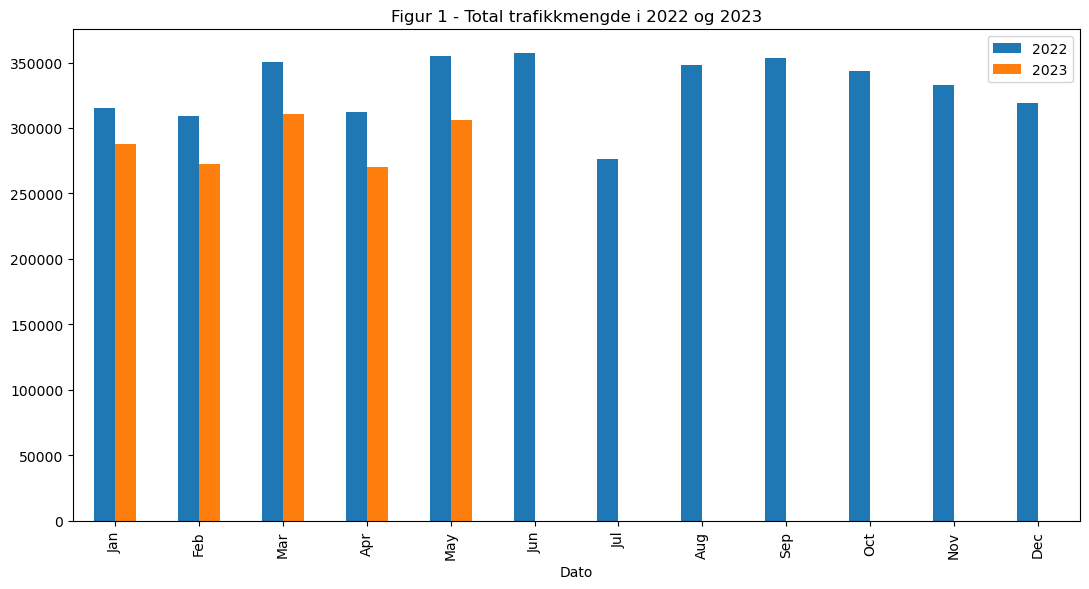

In [4]:
#Konverterer dato til datotype datetime.

gj_dag['Dato'] = pd.to_datetime(gj_dag['Dato'])

#lager dataframe for hvert av årene

df_2022 = gj_dag[gj_dag['Dato'].dt.year == 2022]
df_2023 = gj_dag[gj_dag['Dato'].dt.year == 2023]

#Grupperer dataene etter månedeer og beregner total trafikkmengden hver måned.

grouped_2022 = df_2022.groupby(df_2022['Dato'].dt.strftime('%b'))['Trafikkmengde'].sum()
grouped_2023 = df_2023.groupby(df_2023['Dato'].dt.strftime('%b'))['Trafikkmengde'].sum()

#setter de sammen igjen

df_stacked = pd.DataFrame({'2022': grouped_2022, '2023': grouped_2023})

#Sorterer månedene i riktig rekkefølge og beholder datetime formatet

df_stacked = df_stacked.reindex(pd.to_datetime(df_stacked.index, format='%b').sort_values().strftime('%b'))

#plotter plot og forstørrer

df_stacked.plot(kind='bar', figsize=(11, 6))

plt.title("Figur 1 - Total trafikkmengde i 2022 og 2023")
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
df['Dato'] = pd.to_datetime(df['Dato'])

df_måned = df.groupby(df['Dato'].dt.to_period('M'))['Trafikkmengde'].sum().reset_index()


df_måned.columns = ['Month', 'Total_Trafikkmengde']

In [6]:

#henter timestrafikk

url = 'https://raw.githubusercontent.com/eskilaglen/1006/main/Mappe2/timestrafikk2022.csv'
timestrafikk2022 = pd.read_csv(url, sep=';', encoding='latin1', dtype={'Felt': object})
url1 = 'https://raw.githubusercontent.com/eskilaglen/1006/main/Mappe2/timestrafikk2023.csv'
timestrafikk2023 = pd.read_csv(url1, sep=';', encoding='latin1', dtype={'Felt': object})
warnings.filterwarnings('ignore')

In [7]:
timestrafikk2022 = timestrafikk2022.loc[(timestrafikk2022['Felt'] == 'Totalt'), ['Dato', 'Trafikkmengde', 'Navn','Fra tidspunkt','Til tidspunkt']]
timestrafikk2023 = timestrafikk2023.loc[(timestrafikk2023['Felt'] == 'Totalt'), ['Dato', 'Trafikkmengde', 'Navn','Fra tidspunkt','Til tidspunkt']]

Når bompenger gjør kjøring av personbil dyrere, vil etterspørselen etter bilkjøring gå ned, og det vil være nærliggende å tro at folk bytter ut bilen for andre transportmidler, som kan fungere som substitutter. Figur 3 og 4 bruker data fra de 5 første månedene i 2022 og 2023, og sammenligner antall passasjerer på busser og antall registrerte syklister med året før. Også her er det en klar forskjell, og vi kan se en tydelig økning i disse transportmidlene etter innføringen av bompengeavgiften (med unntak av syklister i mars 2023). 

In [8]:
df_buss = pd.read_csv("https://raw.githubusercontent.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/main/data/antall%20p%C3%A5stigende.csv", parse_dates=['date'], dayfirst=True)
df_buss.drop('Linje', axis=1, inplace=True)

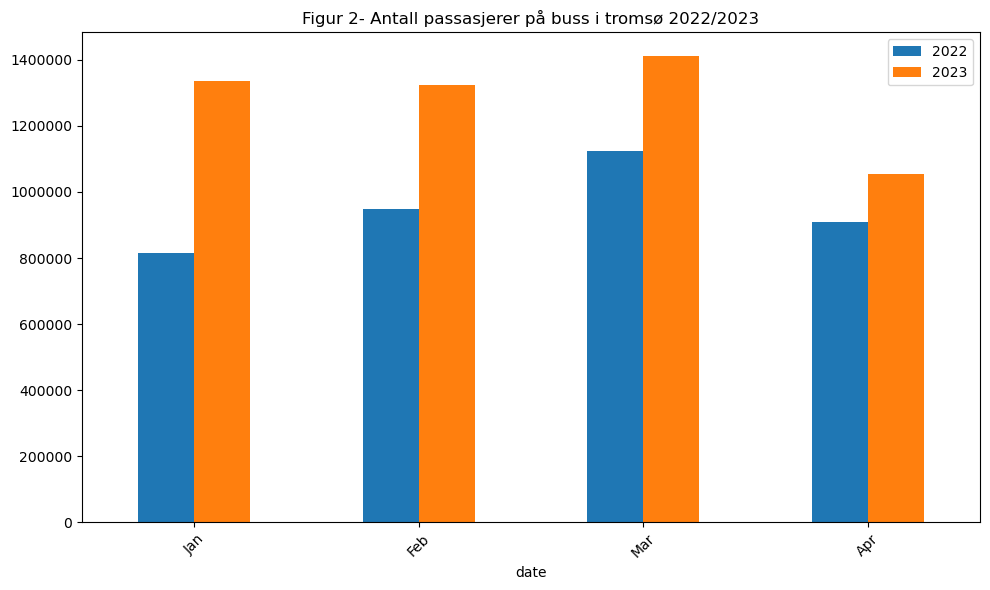

In [9]:
warnings.filterwarnings('ignore')
df_buss['date'] = pd.to_datetime(df_buss['date']) 


df_buss_monthly = df_buss.groupby(df_buss['date'].dt.to_period('M')).sum().reset_index()

df_2022 = df_buss_monthly[(df_buss_monthly['date'].dt.year == 2022) & (df_buss_monthly['date'].dt.month <= 4)]
df_2023 = df_buss_monthly[(df_buss_monthly['date'].dt.year == 2023) & (df_buss_monthly['date'].dt.month <= 4)]

grouped_2022 = df_2022.groupby(df_2022['date'].dt.strftime('%b'))['Påstigende'].sum()
grouped_2023 = df_2023.groupby(df_2023['date'].dt.strftime('%b'))['Påstigende'].sum()

df_stacked = pd.DataFrame({'2022': grouped_2022, '2023': grouped_2023})
#setter sammen, beholder datetime
df_stacked = df_stacked.reindex(pd.to_datetime(df_stacked.index, format='%b').sort_values().strftime('%b'))

df_stacked.plot(kind='bar', figsize=(10, 6))
plt.title("Figur 2- Antall passasjerer på buss i tromsø 2022/2023")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
url2 = 'https://raw.githubusercontent.com/eskilaglen/1006/main/Mappe2/sykkeltraffik.csv'
sykkeltrafikk = pd.read_csv(url2, sep=';', encoding='latin1', dtype={'Felt': object})
sykkeltrafikk = sykkeltrafikk.loc[(sykkeltrafikk['Felt'] == 'Totalt'), ['Dato', 'Trafikkmengde', 'Navn','Fra','Til']]

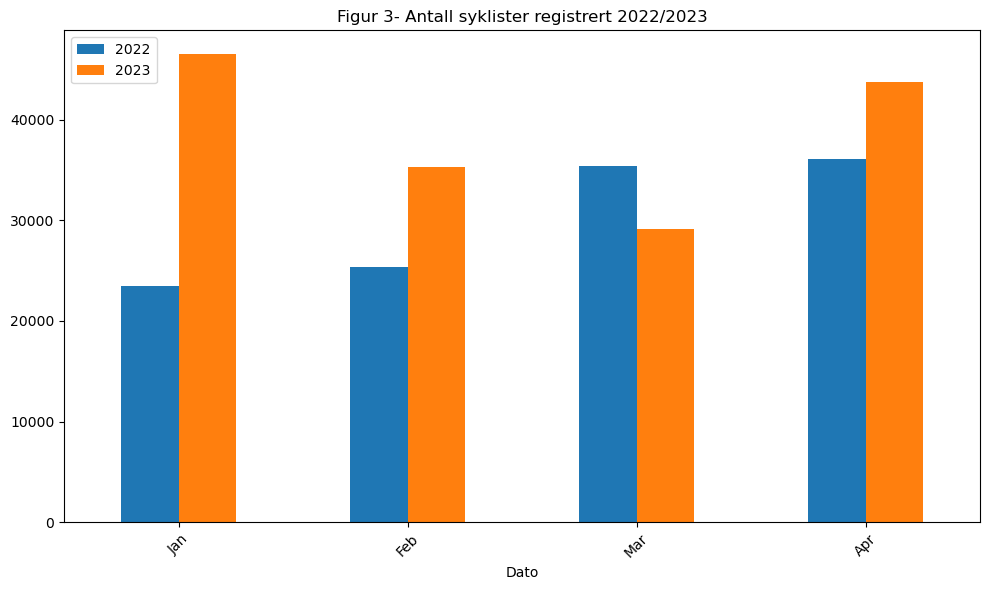

In [13]:
#fjerner warnings
warnings.filterwarnings('ignore')

sykkeltrafikk['Dato'] = pd.to_datetime(sykkeltrafikk['Dato'])

# Gruppr etter måned og summerer trafikkmengde
sykkeltrafikk_måned = sykkeltrafikk.groupby(sykkeltrafikk['Dato'].dt.to_period('M')).sum().reset_index()

#lager dataframe for hvert år 
sykkel_2022 = sykkeltrafikk_måned[(sykkeltrafikk_måned['Dato'].dt.year == 2022) & (sykkeltrafikk_måned['Dato'].dt.month <= 4)]
sykkel_2023 = sykkeltrafikk_måned[(sykkeltrafikk_måned['Dato'].dt.year == 2023) & (sykkeltrafikk_måned['Dato'].dt.month <= 4)]

grouped_2022 = sykkel_2022.groupby(sykkel_2022['Dato'].dt.strftime('%b'))['Trafikkmengde'].sum()
grouped_2023 = sykkel_2023.groupby(sykkel_2023['Dato'].dt.strftime('%b'))['Trafikkmengde'].sum()
#setter sammen igjen
sykkel_stacked = pd.DataFrame({'2022': grouped_2022, '2023': grouped_2023})
#sorterer månedene i riktig rekkefølge og beholder datetime 
sykkel_stacked = sykkel_stacked.reindex(pd.to_datetime(sykkel_stacked.index, format='%b').sort_values().strftime('%b'))
#plot
sykkel_stacked.plot(kind='bar', figsize=(10, 6))
plt.title("Figur 3- Antall syklister registrert 2022/2023")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Rushtidssatser
En annen «fordel» ved bompenger er at den kan hjelpe med å kontrollere trafikkflyten, ved å gi bompasseringer forskjellig pris basert på når på dagen en passererer. I Tromsø er prisen ved rushtiden (06.30-09.00 og 15-17) rundt 200 prosent dyrere enn resten av døgnet (5). Dette vil forhåpentligvis bidra til å fordele trafikken mer, slik at en ungår store køer og kork.
Figur 4 og 5 sammenligner timesdata for trafikken i Tromsø februar 2022 og 2023. Vi kan ut fra figuren se at bompengetillegget tilknyttet til rushtiden ser ut til å være effektivt. Trafikken på alle tidspunkter har gått ned, men betydelig mer i rushtidene. 

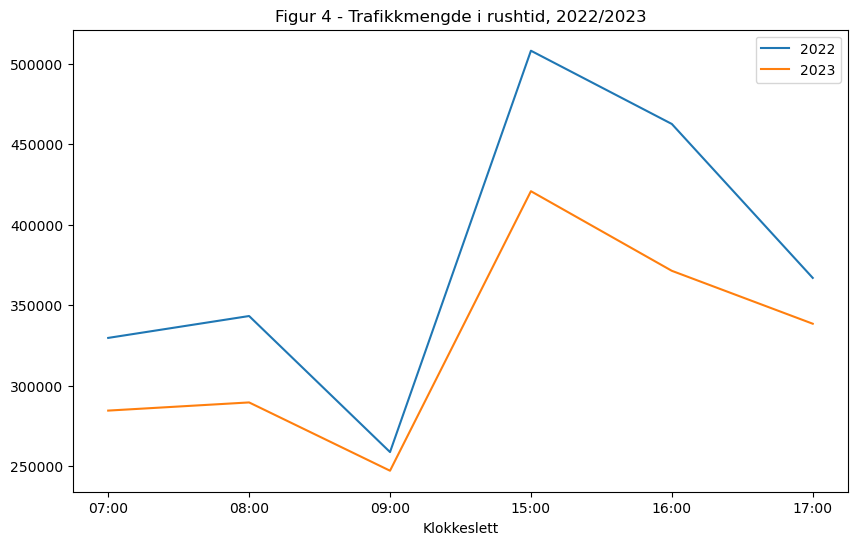

In [14]:
# filtrerer for ønskede timer
timetraffik2022_filtered = timestrafikk2022[
    timestrafikk2022["Fra tidspunkt"].between("07:00", "09:00") | timestrafikk2022["Fra tidspunkt"].between("15:00", "17:00")
]
timetraffik2023_filtered = timestrafikk2023[
    timestrafikk2023["Fra tidspunkt"].between("07:00", "09:00") | timestrafikk2023["Fra tidspunkt"].between("15:00", "17:00")
]

# Grupper dataene etter tidspunkt og beregn summen av trafikkmengden for hver time
timetraffik2022_filtered = timetraffik2022_filtered.groupby("Fra tidspunkt")["Trafikkmengde"].sum()
timetraffik2023_filtered = timetraffik2023_filtered.groupby("Fra tidspunkt")["Trafikkmengde"].sum()


plt.figure(figsize=(10, 6))

# Plot
plt.plot(timetraffik2022_filtered.index, timetraffik2022_filtered.values, label="2022")
plt.plot(timetraffik2023_filtered.index, timetraffik2023_filtered.values, label="2023")


plt.xlabel("Klokkeslett")
plt.title("Figur 4 - Trafikkmengde i rushtid, 2022/2023")
plt.legend()
plt.show()


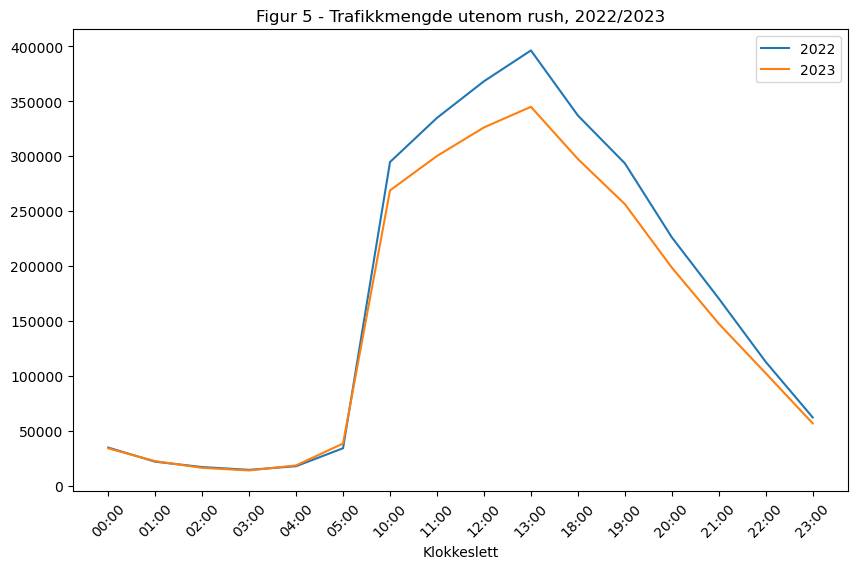

In [15]:
# filtrerer for ønskede timer
timetraffik2022_filtered = timestrafikk2022[
    ~(timestrafikk2022["Fra tidspunkt"].between("06:00", "09:00") | timestrafikk2022["Fra tidspunkt"].between("14:00", "17:00"))
]
timetraffik2023_filtered = timestrafikk2023[
    ~(timestrafikk2023["Fra tidspunkt"].between("06:00", "09:00") | timestrafikk2023["Fra tidspunkt"].between("14:00", "17:00"))
]

# Grupper etter tidspunkt og beregn trafikkmengde sum 
timetraffik2022_filtered = timetraffik2022_filtered.groupby("Fra tidspunkt")["Trafikkmengde"].sum()
timetraffik2023_filtered = timetraffik2023_filtered.groupby("Fra tidspunkt")["Trafikkmengde"].sum()


plt.figure(figsize=(10, 6))

# Plot
plt.plot(timetraffik2022_filtered.index, timetraffik2022_filtered.values, label="2022")
plt.plot(timetraffik2023_filtered.index, timetraffik2023_filtered.values, label="2023")


plt.xlabel("Klokkeslett")
plt.title("Figur 5 - Trafikkmengde utenom rush, 2022/2023")
plt.xticks(rotation=45)
plt.legend()
plt.show()




### Kapittel 3 - Bilisters tilpasning til bompenger

I det følgende forutsetter jeg at budsjettet til konsumenten utelukkende brukes på enten kjørte kilometer eller andre goder, altså blir det aldri penger til overs - konsumenten prøver til enhver tid å få høyest mulig nytteverdi. Figur 6 viser budsjettlinjen og mulighetsområdet for konsumenten før og etter innføringen av bompengeavgiften. Mulighetsrommet er det området som er under budsjettlinjen, altså alle de forskjellige kombinasjonene av x1 og x2 en potensielt kan velge. Etter den økte prisen blir helningen brattere, og vi mister noe mulighetsrom (det skraverte området). Vi beveger oss innover på x-aksen når prisen på kjørte kilometer stiger, og vi får råd til færre kilometer om vi skulle valgt å bruke 100 prosent av budsjettet på x1. 


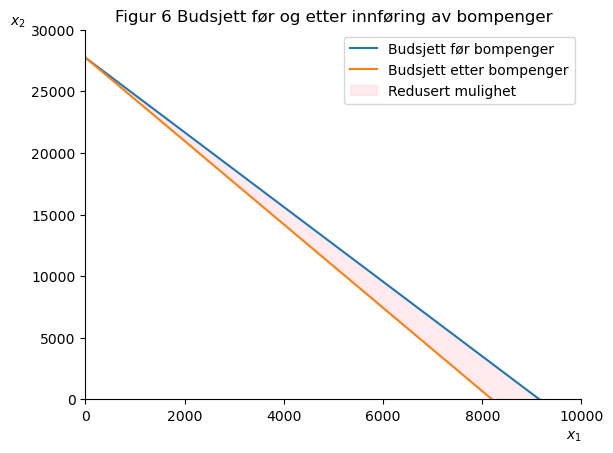

In [16]:
import matplotlib.pyplot as plt
import numpy as np
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$x_2$', loc='top', rotation=0)
                ax.set_xlabel('$x_1$', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_xlim(0,10000)
                ax.set_ylim(0,30000)
                return fig, ax


x=np.linspace(1,10000, 100)

def budsjett(m, p_1, p_2, x_1):
    return (m-p_1*x_1/p_2)

fig, ax = create_ax()

ax.plot(x, budsjett(27731, 3.03, 1, x), label = 'Budsjett før bompenger')
ax.plot(x, budsjett(27731, 3.3834460994698308, 1, x), label = 'Budsjett etter bompenger')

ax.fill_between(x, budsjett(27731, 3.03, 1, x), budsjett(27731, 3.3834460994698308, 1, x),color = "pink",alpha = 0.3,label='Redusert mulighet')

ax.set_ylim(bottom=0)

ax.set_title('Figur 6 Budsjett før og etter innføring av bompenger')
ax.legend(loc='best');

#### Stone Geary nyttefunksjon
Jeg har valgt å bruke en Stone Geary nyttefunksjon i stedet for en Cobb-Douglas, da SG inneholder gammaverdier - som tar hensyn til minimumsnivåer for goder. Folk har visse behov som mat, husly, klær, og så videre, som må møtes uansett hva. Dette gjør at Stonge Geary nyttefunksjonen blir langt mer realistisk og andvendelig en cobb douglas. Stone Geary nyttefunksjonen her gis som: 

β1log(x1- γ1)+ β2log(x2- γ2)
 
Jeg har valgt å bare se på konsumenter med fossilbiler, og deres endring i atferd etter innføringen av bompengeavgiften, da disse er de som blir rammet hardest. Deres endring i atferd burde være mer merkbar enn dette hos konsumenter med elektriske biler, siden de får store rabatter på hver passering. Verdiene er månedlig – altså månedslønn, gjennomsnittlig månedlig kostnad for bompenger osv. 

De forskjellige verdiene er funnet på følgende måte:

W = Busjettbetingelse for før og etter bompenger 

x1 - Gjennomsnittslønnen i 2022 fra SSB (6)

x2 – Gjennomsnittlig kjørelengde per personbil – hentet fra SSB (7)

B1 – w*elastisitet funnet i KVARTS / MODAG dokument før / etter bompenger

B2 – (1- B1)

Y1 – Minimumskonsum for kjørte km – løste ligning 6 for gamma 

Y2 – Minimumskonsum for andre goder - NAV uføretrygd for aleneboere (8) , med 50/30/20 regelen for å bestemme absolutt minimum 



## Optimalisering og Stone Geary
Figur 7 viser den optimale tilpasningen for konsumenten med den opprinnelige budsjettbetingelsen fra før innføringen av bompenger. Vi treffer her nyttenivå U0.  



In [19]:
import sympy as sp
#definerer symboler

bta_1, bta_2, bta_1_2, bta_2_2, gma_1, gma_2 = sp.symbols('\u03B2_1 \u03B2_2 \u03B2_1_2 \u03B2_2_2 \u03B3_1 \u03B3_2', real=True, positive=True)
x_1, x_2, p_1, p_2,p_1_2, m = sp.symbols("x_1 x_2 p_1 p_2 p_1_2 m", real=True, positive=True)


In [21]:
import sympy as sp

nytte_sg = bta_1*sp.log(x_1-gma_1) + (1-bta_1)*sp.log(x_2-gma_2)
nytte_sg1 = bta_1_2*sp.log(x_1-gma_1) + (1-bta_1_2)*sp.log(x_2-gma_2)

# gode 2 (se forelesning 13)

x_2_eq = gma_2 + (bta_2/p_2)*(m-p_1*gma_1-p_2*gma_2)
x_2_eq_1 = gma_2 + (bta_2_2/p_2)*(m-p_1_2*gma_1-p_2*gma_2)
# budsjett
def budsjett(m, x_1, p_1, p_2):
    return m/p_2 - (p_1*x_1/p_2)

x_1_eq = gma_1 + (bta_1/p_1)*(m-p_1*gma_1-p_2*gma_2)
x_1_eq_1 = gma_1 + (bta_1_2/p_1_2)*(m-p_1_2*gma_1-p_2*gma_2)
V = nytte_sg.subs([(x_1, x_1_eq), (x_2, x_2_eq)])
V
V1 = nytte_sg1.subs([(x_1, x_1_eq_1), (x_2, x_2_eq_1)])



In [22]:
U_0=sp.symbols('U_0', real = True, positive=True)

ind_k = (nytte_sg-U_0, x_2)[0]


In [23]:
#indifferenskurve
def ind_k_fn(bta_1, gma_1, gma_2, x_1, U_0):
    # Beregn størt mulig verdi av x_1 
    x_1_ekte = np.maximum(x_1 - gma_1, 0.001) 
    return gma_2 + np.exp((bta_1 * np.log(x_1_ekte) - U_0) / (bta_1 - 1))


In [24]:
#etter bompenger
def ind_k_fn_2(bta_1_2, gma_1, gma_2, x_1, U_0):
    x_1_ekte1 = np.maximum(x_1 - gma_1, 0.001) 
    return gma_2 + np.exp((bta_1_2 * np.log(x_1_ekte1) - U_0) / (bta_1_2 - 1))


In [25]:
#setter inn verdier
x_1_eq_num = float(x_1_eq.subs([(bta_1, 0.017336377971712308), (gma_1, 324), (gma_2, 900.25), (m, 27731), (p_1, 3.03), (p_2, 1)]))
x_2_eq_num = float(x_2_eq.subs([(bta_2, 0.9826636220282877), (gma_1, 324), (gma_2, 900.25), (m, 27731), (p_1, 3.03), (p_2, 1)]))
nytte_sg_num = float(V.subs([(bta_1,0.017336377971712308),(bta_2, 0.9826636220282877), (gma_1, 324), (gma_2, 900.25), (m, 27731), (p_1, 3.03), (p_2, 1)]))


In [26]:
#etter bompenger
x_1_eq_num_1 = float(x_1_eq_1.subs([(bta_1_2, 0.01927487161101354), (gma_1, 324), (gma_2, 900.25), (m, 27731), (p_1_2,3.3834460994698308), (p_2, 1)]))
x_2_eq_num_1 = float(x_2_eq_1.subs([(bta_2_2, 0.9807251283889865), (gma_1, 324), (gma_2, 900.25), (m, 27731), (p_1_2,3.3834460994698308), (p_2, 1)]))
nytte_sg_num1 = float(V1.subs([(bta_1_2,0.01927487161101354),(bta_2_2, 0.9807251283889865), (gma_1, 324), (gma_2, 900.25), (m, 27731), (p_1_2, 3.3834460994698308), (p_2, 1)]))


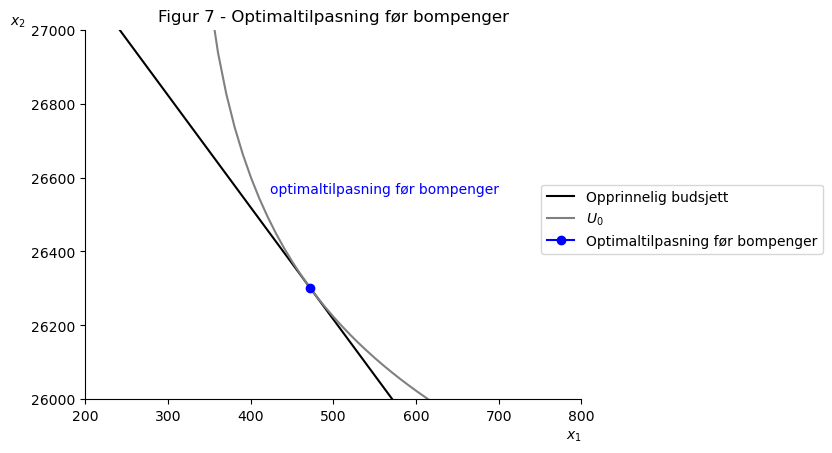

In [27]:
X = np.linspace (0.001,10000,1000)
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$x_2$', loc='top', rotation=0)
                ax.set_xlabel('$x_1$', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_xlim(0,10000)
                ax.set_ylim(0,30000)
                return fig, ax
 
fig1, ax = create_ax()
ax.set(xlim=(200,800))
ax.set(ylim=(26000,27000))

ax.set_ylabel('$x_2$', loc='top', rotation=0)

ax.plot(X, budsjett(27731, X, 3.03, 1), color='black', label='Opprinnelig budsjett')
ax.plot(X, ind_k_fn(0.017336377971712308,324,900.25,X,nytte_sg_num), color='grey',label='$U_0$')
ax.plot(x_1_eq_num, x_2_eq_num, marker='o', color='blue', label='Optimaltilpasning før bompenger')
ax.text(700, 26550, 'optimaltilpasning før bompenger', 
        verticalalignment='bottom', horizontalalignment='right', color='blue')
# tittel
ax.set_title('Figur 7 - Optimaltilpasning før bompenger')

#legende
ax.legend(bbox_to_anchor=(1.5,0.6));

Figur 8 viser optimal tilpasning før og etter bompenger. Når vi setter opp prisen, ser vi at helningen blir brattere, og vi må ned på et lavere nyttenivå om inntekten er det samme. På grunn av den økte prisen av kjørte kilometer flytter vi oss ned fra nyttenivå U0 til U1.

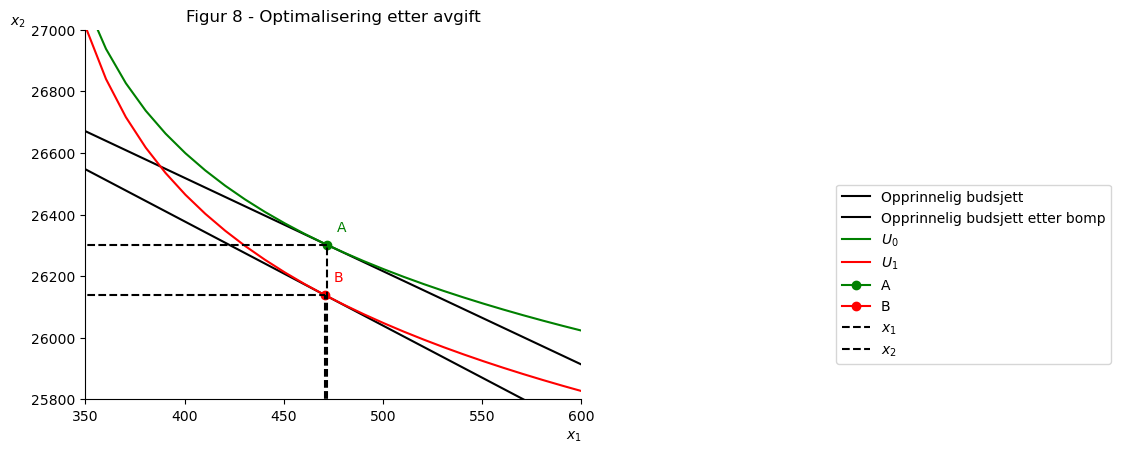

In [28]:
X = np.linspace (0.001,10000,1000)
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$x_2$', loc='top', rotation=0)
                ax.set_xlabel('$x_1$', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_xlim(350, 600)
                ax.set_ylim(25800, 27000) 
                return fig, ax



fig1, ax = create_ax()


ax.set_ylabel('$x_2$', loc='top', rotation=0)

ax.plot(X, budsjett(27731, X, 3.03, 1), color='black', label='Opprinnelig budsjett')
ax.plot(X, budsjett(27731, X, 3.3834460994698308, 1), color='black', label='Opprinnelig budsjett etter bomp')

ax.plot(X, ind_k_fn(0.017336377971712308,324,900.25,X,nytte_sg_num), color='green',label='$U_0$')
ax.plot(X, ind_k_fn_2(0.01927487161101354,324,900.25,X,nytte_sg_num1), color='red',label='$U_1$')

ax.plot(x_1_eq_num, x_2_eq_num, marker='o', color='green', label='A')
ax.plot(x_1_eq_num_1, x_2_eq_num_1, marker='o', color='red', label='B')


ax.vlines(x_1_eq_num,0,x_2_eq_num, color='black',ls='dashed', label='$x_1$')
ax.hlines(x_2_eq_num,0,x_1_eq_num, color='black',ls='dashed', label='$x_2$')
ax.vlines(x_1_eq_num_1,0,x_2_eq_num_1, color='black',ls='dashed')
ax.hlines(x_2_eq_num_1,0,x_1_eq_num_1, color='black',ls='dashed')


ax.annotate('A', (x_1_eq_num, x_2_eq_num), textcoords="offset points", xytext=(10, 10), ha='center', color='green')
ax.annotate('B', (x_1_eq_num_1, x_2_eq_num_1), textcoords="offset points", xytext=(10, 10), ha='center', color='red')

ax.set_title('Figur 8 - Optimalisering etter avgift')
ax.legend(bbox_to_anchor=(1.5,0.6));

### Inntekt og substitusjonseffekt
Videre viser Figur 9 den originale og den nye tilpasningen, med en ny linje for ny tilpasning med tilstrekkelig kompensasjon, slik at vi oppnår det originale nyttenivået U0. Vi kan her se substitusjonseffekten, (fra punkt A til punkt C), hvor den nye optimale tilpasningen etter økt pris inneholder færre kjørte kilometer, og mer av andre goder. Altså er substitusjonseffekten negativ for gode 1, og positiv for gode 2. Inntektseffekten er endringen i konsumet av kjørte kilometer og klær som følge av at du nå kan kjøpe mindre fordi prisen på kjørte kilometer har steget, og er dermed negativ. Når konsumenten får en kompensasjon på 171 kroner, blir tilpasningen paralellforskyvet lenger opp på grafen, og treffer U0 på ett nytt punkt (C), med færre kilometer kjørt, og mer av andre goder. 



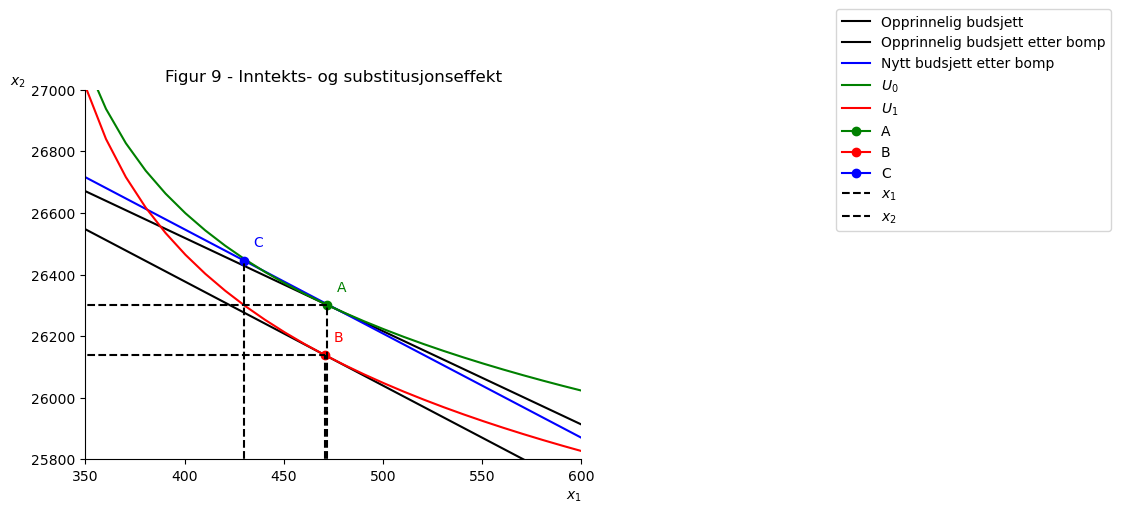

In [29]:
X = np.linspace (0.001,10000,1000)
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$x_2$', loc='top', rotation=0)
                ax.set_xlabel('$x_1$', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_xlim(350, 600)
                ax.set_ylim(25800, 27000) 
                return fig, ax

fig1, ax = create_ax()


ax.set_ylabel('$x_2$', loc='top', rotation=0)

ax.plot(X, budsjett(27731, X, 3.03, 1), color='black', label='Opprinnelig budsjett')
ax.plot(X, budsjett(27731, X, 3.3834460994698308, 1), color='black', label='Opprinnelig budsjett etter bomp')
ax.plot(X, budsjett(27900, X, 3.3834460994698308, 1), color='blue', label='Nytt budsjett etter bomp')

ax.plot(X, ind_k_fn(0.017336377971712308,324,900.25,X,nytte_sg_num), color='green',label='$U_0$')
ax.plot(X, ind_k_fn_2(0.01927487161101354,324,900.25,X,nytte_sg_num1), color='red',label='$U_1$')

ax.plot(x_1_eq_num, x_2_eq_num, marker='o', color='green', label='A')
ax.plot(x_1_eq_num_1, x_2_eq_num_1, marker='o', color='red', label='B')
ax.plot(430,26445, marker='o', color='blue', label='C')

ax.vlines(x_1_eq_num,0,x_2_eq_num, color='black',ls='dashed', label='$x_1$')
ax.hlines(x_2_eq_num,0,x_1_eq_num, color='black',ls='dashed', label='$x_2$')
ax.vlines(x_1_eq_num_1,0,x_2_eq_num_1, color='black',ls='dashed')
ax.hlines(x_2_eq_num_1,0,x_1_eq_num_1, color='black',ls='dashed')
ax.vlines(430,0,26445,color='black',ls='dashed')

ax.annotate('A', (x_1_eq_num, x_2_eq_num), textcoords="offset points", xytext=(10, 10), ha='center', color='green')
ax.annotate('B', (x_1_eq_num_1, x_2_eq_num_1), textcoords="offset points", xytext=(10, 10), ha='center', color='red')
ax.annotate('C', (430, 26445), textcoords="offset points", xytext=(10, 10), ha='center', color='blue')

ax.set_title('Figur 9 - Inntekts- og substitusjonseffekt')
ax.legend(bbox_to_anchor=(1.5,0.6));

### Kapittel 4 – konklusjon
Fra analysen det virker det som at innføringen av bompenger har resultert i en nedgang i biltrafikk, og økt bruken av buss og sykkel. Bilister har også endret kjøremønsteret sitt på grunn av den ekstra utgiften som kommer ved å kjøre i rushen, og trafikken er mer fordelt utover dagen. På kort sikt kan vi konstantere at bilistene har endret atferden rundt bompengene, da disse blir for mye av en økonomisk byrde. Atferden deres på lang sikt vil avhenge av hvordan bompengene blir disponert og hvor effektiv Tenk Tromsø-pakken fungerer. Om tilbudet for kollektiv transport blir bedre og mer attraktivt for konsumentene, kan det hende at det blir en permanent endring i favør kollektivtransport og bruk av sykkel. Om tilbudet ikke forbedrer seg merkbart, kan det være at konsumenter går tilbake til gamle vaner og trafikkmengden får et tilbakefall.


## Fotnoter 
1-  https://nye.naf.no/elbil/bruke-elbil/bompenger-for-elbil

2- https://tenktromso.no/dette-er-bypakke-tenk-tromso

3- https://snl.no/bompenger

4- https://www.vegvesen.no/trafikkdata/

5- https://bpsnord.no/bypakke-tenk-tromso/

6- https://www.ssb.no/arbeid-og-lonn/lonn-og-arbeidskraftkostnader/statistikk/lonn

7- https://www.ssb.no/transport-og-reiseliv/landtransport/statistikk/kjorelengder-

8- https://www.nav.no/uforetrygd

## Ligninger og diverse kilder

Jussila, Mira, T., Saara, K., & Jouku. (2012). Working Papers 39 - The estimation of LES elasticities for CGE . Helsinki: Government Institute for Economic Research.

Sand, Ø., Johansen, B., Halse, A., & Sæther, S. (2022). Road Tolls in Norway 2005-2021. Oslo: Institute of Transport Economics.

## Appendiks – Bruk av Chat GPT
I løpet av oppgaven har jeg eksperimentert noe med Chat GPT, og brukt noen av outputene. 

### Debugging/error meldinger

I all hovedsak har jeg lagt inn error eller warning- meldinger jeg har motatt, slik at Chat kan fortelle meg hva som er galt, og hva jeg kan gjøre med det. Dette var den ganske flink til. Eksempelvis hadde jeg noen warnings jeg ikke fikk fjernet ved innlasting av data. Den gav meg en kode «warnings.filterwarnings('ignore')» som fikk disse fjernet, så PDF-en så bedre ut.

### Plotting

En annen måte jeg har brukt chat på, er estetikken i plot. Jeg sendte inn koden til et par av plottene mine, og spurte om den kunne gjøre dem penere. Dette gjorde ikke, men eksempelvis er «plt.xticks(rotation=45)» noe den ofte legger inn, hvilket gjør x-aksen mer lesbar, om det er mange punkter.

### Tekst

Jeg har ikke brukt Chat GPT eller annen KI i forbindelse med teksten.
 